# 2절. 머신러닝 모델링 및 하이퍼파라미터 튜닝 실습하기
항공권 가격 예측 데이터 세트와 항공사 고객 만족 여부 데이터 세트를 가지고 머신러닝 모델을 학습한 다음, 하이퍼파라미터 튜닝 실습을 통해 성능을 개선해 봅니다. 데이터는 항공권 가격 예측 데이터에 있는 clean_Dataset.csv를 사용합니다.

## 1. [회귀] 항공권 가격 예측 모델링하기
금액을 예측하는 과제이므로 회귀 분석에 포함됩니다. 회귀 모델을 만들기 위해 데이터를 확인합니다.

<div style="display:table; border-collapse:collapse; width:100%; text-align:center;">
	<div style="display:table-row; background-color:#d9e2f3; font-weight:bold">
		<div style="display:table-cell; border:1px solid black; padding:5px;">칼럼명</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">설명</div>
        <div style="display:table-cell; border:1px solid black; padding:5px;">칼럼명</div>
        <div style="display:table-cell; border:1px solid black; padding:5px;">설명</div>
	</div>
	<div style="display:table-row;">
		<div style="display:table-cell; border:1px solid black; padding:5px;">Airline</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">항공사 이름</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">Destination City</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">도착 도시</div>
	</div>
	<div style="display:table-row;">
		<div style="display:table-cell; border:1px solid black; padding:5px;">Flight</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">항공편명</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">Class</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">좌석 등급</div>
	</div>
	<div style="display:table-row;">
		<div style="display:table-cell; border:1px solid black; padding:5px;">Source City</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">출발 도시</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">Duration</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">비행시간</div>
	</div>
	<div style="display:table-row;">
		<div style="display:table-cell; border:1px solid black; padding:5px;">Departure Time</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">출발 시간</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">Days Left</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">출발까지 남은 일자</div>
	</div>
	<div style="display:table-row;">
		<div style="display:table-cell; border:1px solid black; padding:5px;">Stops</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">환승장 수</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">Price</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">항공권 가격</div>
	</div>
	<div style="display:table-row;">
		<div style="display:table-cell; border:1px solid black; padding:5px;">Arrival Time</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">도착 시간</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;"></div>
		<div style="display:table-cell; border:1px solid black; padding:5px;"></div>
	</div>
</div>

### 1) 데이터 불러오기

In [10]:
# 판다스 라이브러리 불러오기
import pandas as pd
cdf = pd.read_csv("Clean_Dataset.csv")

# 학습시간 단축을 위해 5000건만 추출하기
cdf = cdf[:5000]

# 데이터 확인하기
cdf.head(1) 

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


데이터를 읽었을 때 Unnamed: 0이라는 칼럼 데이터를 볼 수 있습니다. 데이터세트를 처음 저장했을 때 index를 같이 저장하여 생긴 칼럼으로 모델 학습에 불필요하니 삭제합니다. 

### 2) 데이터 전처리하기
#### (1) Unnamed 삭제 및 데이터 기초 통계 정보 확인하기

In [11]:
# Unnamed: 0 데이터 분포 확인하기
cdf["Unnamed: 0"].value_counts() 

Unnamed: 0
0       1
3330    1
3337    1
3336    1
3335    1
       ..
1666    1
1665    1
1664    1
1663    1
4999    1
Name: count, Length: 5000, dtype: int64

In [12]:
# Unnamed 컬럼 삭제하기
cdf.drop("Unnamed: 0", axis = 1, inplace =True)

각 칼럼별 기초 통계 정보를 확인합니다. 

In [13]:
 # 기초 통계정보 확인하기
cdf.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,5000,5000,5000,5000,5000,5000,5000,5000,5000.000000,5000.000000,5000.000000
unique,6,222,1,6,3,6,1,1,NaN,NaN,NaN
top,Vistara,UK-819,Delhi,Evening,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,1496,90,5000,1391,3619,1702,5000,5000,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.665682,14.216800,7589.786600
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.247512,7.109536,4476.362204
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,2409.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.330000,8.000000,4678.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.670000,14.000000,5955.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.080000,20.000000,10549.000000


8개의 문자형 칼럼에 대한 정보와 3개의 수치형 칼럼에 대한 정보를 확인할 수 있습니다. 

#### (2) Null 데이터 분석 및 처리하기
기본적인 정보는 확인했으니 Null 데이터가 없는지 확인합니다. 

In [15]:
# info를 통해 Null 데이터 및 type 확인 있는지 1차 확인하기(isna를 사용해도 됨)
print("Null 데이터 확인")
cdf.info() 

Null 데이터 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           5000 non-null   object 
 1   flight            5000 non-null   object 
 2   source_city       5000 non-null   object 
 3   departure_time    5000 non-null   object 
 4   stops             5000 non-null   object 
 5   arrival_time      5000 non-null   object 
 6   destination_city  5000 non-null   object 
 7   class             5000 non-null   object 
 8   duration          5000 non-null   float64
 9   days_left         5000 non-null   int64  
 10  price             5000 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 429.8+ KB


info로 확인한 결과 모든 데이터의 non-null 개수가 동일한 것으로 보아 Null 데이터가 없는 것을 알 수 있습니다. 

#### (3) airline 칼럼 분석 및 처리하기
이번 장에서는 하이퍼파라미터 튜닝을 위해 간단히 전처리만 할 예정이므로 airline과 flight 정보가 머신러닝 데이터로서 유의미한지 살펴봅니다.<br>
우선 airline(항공사) 칼럼이 어떤 분포를 통해 구성되어 있는지 확인합니다. 

In [16]:
# 첫 번째 컬럼이 의미있는 컬럼인지 확인하기 위해 value_count로 분포 확인하기
cdf.airline.value_counts()

airline
Vistara      1496
Air_India    1311
Indigo        813
GO_FIRST      801
SpiceJet      296
AirAsia       283
Name: count, dtype: int64

value_counts 메소드를 통해 분포를 확인하면 총 6개 항공사가 보입니다. 항공사의 수가 몇 개 되지 않기에 가격과 연관성이 있는지 그래프를 통해 확인합니다.

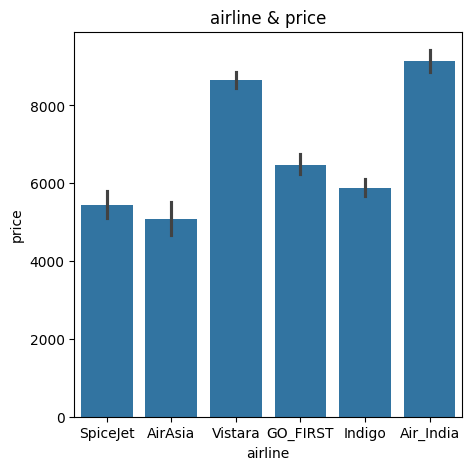

In [17]:
# 그래프 라이브러리 불러오기(matplotlib, seaborn)
import matplotlib.pyplot as plt
import seaborn as sns
# Seaborn 으로 막대그래프 그리기
# 배경 사이즈 설정하기
plt.figure(figsize=(5,5))
# 막대그래프 차트 그리기 
ax = sns.barplot(x='airline', y='price', data=cdf)
# 상단 타이틀 지정하기
ax.set(title='airline & price')
# 그래프 출력하기
plt.show() 

그래프를 보면 비스타라(Vistara) 항공사와 에어인디아(Air_India) 항공사의 가격이 높은 것을 확인할 수 있습니다. 항공사별로 가격에 영향을 주는 것처럼 보이니 일단 airline 칼럼은 유지합니다. 


#### (4) flight 칼럼 분석 및 처리하기
flight 칼럼을 분석해 봅니다. 

In [18]:
# 2번째 flight 값 재확인하기
cdf.head(1)

# flight column 분포 확인하기
cdf.flight.value_counts()

flight
UK-819     90
UK-879     62
UK-899     61
UK-705     61
UK-835     60
           ..
AI-9939     2
I5-881      2
I5-744      1
SG-9974     1
SG-8339     1
Name: count, Length: 222, dtype: int64

데이터에서 보듯이 flight는 항공편명입니다. 항공편명은 222개의 유일값(unique) 데이터가 존재하고 데이터의 분포도 어느 정도 있어 보입니다. <br>
이번에는 추가 분석보다 항공편명의 의미를 확인하고 전처리 및 삭제 진행 유무를 정해 봅니다. 국적 항공사에서 제공한 정보를 토대로 항공편명이 머신러닝 데이터로서 가치 있는지를 확인합니다. 

**1. 3자리 코드와 4자리 코드는 유의미한 데이터인가?**
<div style="display:table; border-collapse:collapse; width:100%; text-align:center;">
	<div style="display:table-row; background-color:#d9e2f3; font-weight:bold">
		<div style="display:table-cell; border:1px solid black; padding:5px;">항공편명</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">의미</div>
	</div>
	<div style="display:table-row;">
		<div style="display:table-cell; border:1px solid black; padding:5px;">3자리 코드</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">국제선</div>
	</div>
	<div style="display:table-row;">
		<div style="display:table-cell; border:1px solid black; padding:5px;">4자리 코드</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">국내선</div>
	</div>
</div>
▲ 비행 코드의 의미 <p>

**2. 코드의 패턴은 유의미한가?**
<div style="display:table; border-collapse:collapse; width:100%; text-align:center;">
	<div style="display:table-row; background-color:#d9e2f3; font-weight:bold">
		<div style="display:table-cell; border:1px solid black; padding:5px;">사업/지역(대한항공 기준)</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">대한항공 코드</div>
        <div style="display:table-cell; border:1px solid black; padding:5px;">아시아나 코드</div>
	</div>
	<div style="display:table-row;">
		<div style="display:table-cell; border:1px solid black; padding:5px;">미주</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">001~099</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">600~699</div>
	</div>
	<div style="display:table-row;">
		<div style="display:table-cell; border:1px solid black; padding:5px;">대양주 및 괌</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">100~149</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">600~699</div>
	</div>
	<div style="display:table-row;">
		<div style="display:table-cell; border:1px solid black; padding:5px;">중국(몽골 포함)</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">150~199<br>800~899</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">300~399(중국만)</div>
	</div>
	<div style="display:table-row;">
		<div style="display:table-cell; border:1px solid black; padding:5px;">동남아, 홍콩, 대만</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">460~499<br>600~699</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">700~799</div>
	</div>
	<div style="display:table-row;">
		<div style="display:table-cell; border:1px solid black; padding:5px;">일본</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">700~799</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">001~099</div>
	</div>
	<div style="display:table-row;">
		<div style="display:table-cell; border:1px solid black; padding:5px;">유럽</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">900~999</div>
		<div style="display:table-cell; border:1px solid black; padding:5px;">500~599(몽골 포함)</div>
	</div>
</div>
▲ 항공편명 패턴 

항공편명이 충분히 유의미한 것으로 보입니다. 다만 데이터 내에 ‘출발지, 도착지, 거리’ 등이 있어 대체 가능한 것으로 보입니다. 따라서 fight 칼럼은 삭제하는 것으로 전처리합니다. 

In [19]:
# flight 칼럼은 다른 칼럼과 의미가 중복되는 것으로 보이므로 삭제하기
cdf.drop('flight', axis=1, inplace=True)
# 잘 삭제되었는지 shape 확인하기
cdf.shape

(5000, 10)

2가지 데이터의 기본 분석만을 바탕으로 어떤 모델이 좋은 성능을 발휘하는지 데이터를 모델에 적용하여 확인합니다. 


#### (5) 원핫 인코딩하기
먼저 모델 적용을 위한 필수 항목인 범주형 데이터의 수치화를 진행합니다. 데이터를 다시 확인해보면 문자형(object) 변수 중에 실제로는 숫자로 된 수치값인데 문자형으로 지정되어 있거나, 수치형(float64, int64) 변수 중 실제로는 범주형이지만 수치형으로 지정되어 있는 것은 없습니다. info정보에서 확인한 전체 문자형(object) 변수에 대해 원핫 인코딩을 적용합니다. 

In [20]:
# one_hot 인코딩을 위해 get_dummies 처리하기
dummies_cdf = pd.get_dummies(cdf, 
               columns=["airline", 'source_city','departure_time', 'stops','arrival_time', 'destination_city', 'class'],
               drop_first=True
              )

# 인코딩 확인하기
print(f'''원핫인코딩 전 {cdf.shape}
원핫인코딩 후 {dummies_cdf.shape}''')

원핫인코딩 전 (5000, 10)
원핫인코딩 후 (5000, 20)


#### (6) 학습 데이터 만들기
인코딩이 완료된 데이터를 x(입력변수)와 y(타깃 변수) 데이터로 분리합니다. 

In [21]:
# 데이터프레임에서 타깃 변수만 y로 추출하기
y = dummies_cdf.price

# y 값의 형태 확인하기
y.head(5)

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

실행 결과를 보면 우리가 활용해야 할 타깃 변수만을 정상적으로 분리한 것을 확인할 수 있습니다. 다음은 데이터프레임에서 타깃 변수를 제외한 입력 데이터세트를 만들어 봅니다.

In [22]:
# 데이터프레임에서 타깃 변수를 제외한 입력 데이터세트를 생성하기
x = dummies_cdf.drop('price', axis=1)

x.head(5)

# shape 확인하기
x.shape, y.shape

((5000, 19), (5000,))

실행 결과 타깃 변수인 price가 제거된 학습 데이터만 남아 있습니다. 

### 3) 모델 학습하기
학습 데이터와 라벨 데이터가 갖춰졌으니 이제 머신러닝 모델 작업을 진행합니다. 사이킷런 기반의 모델들을 불러오고, 앙상블 계열 모델을 몇 개 더 추가하여 성능을 비교해 봅니다. 

#### (1) 머신러닝 라이브러리 불러오기

In [1]:
# # xgboost, lightgbm모델 설치하기
# !pip install xgboost
# !pip install lightgbm

  Using cached xgboost-2.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.2-py3-none-win_amd64.whl (124.9 MB)
  Using cached lightgbm-4.5.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.5.0-py3-none-win_amd64.whl (1.4 MB)


In [27]:
# scikit learn 기반 라이브러리 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

# scikit learn 외 라이브러리 불러오기
from xgboost import XGBRFRegressor
from lightgbm import LGBMRegressor

# 학습_검증 데이터 분리 라이브러리 불러오기
from sklearn.model_selection import train_test_split

사이킷런의 5개 모델(LinearRegression, DecisionTree, RandomForest, GradientBoosting, ExtraTrees)과 외부 모델 2가지(xgboost, lightgbm)를 더해 총 7가지 모델로 학습을 진행합니다. 

#### (2) 머신러닝 모델 생성하기

In [28]:
# 머신러닝 모델 생성하기
# 모델 생성 시 n_jobs 옵션이 있는 모델은 -1을 적용하여 동작 시키는 것을 권유함
lr = LinearRegression( n_jobs=-1)
dtr = DecisionTreeRegressor( random_state=1)
rfr = RandomForestRegressor( random_state=1)
gbr = GradientBoostingRegressor( random_state=1)
xgbr = XGBRFRegressor(n_jobs=-1, random_state=1)
etr = ExtraTreesRegressor(n_jobs=-1, random_state=1)
lgbmr = LGBMRegressor(n_jobs=-1, random_state=1)

모델 생성까지 진행했으니 이제 학습을 해야 하는데 지금까지 한 작업을 고려했을 때 시험 데이터세트가 없습니다. 따라서 훈련 데이터세트를 만들고 학습하는 과정까지 진행합니다. 

In [30]:
# 훈련 데이터 분할하기
x_train, x_test, y_train ,y_test = train_test_split(x, y , 
                   test_size=0.3,
                   random_state=2023, # 서로 다른 결과를 나타내지 않기
                )
# shape 확인하기
x_test.shape, y_test.shape

((1500, 19), (1500,))

In [31]:
# shape 확인하기
x_train.shape, y_train.shape

((3500, 19), (3500,))

#### (3) 머신러닝 모델 학습하기

In [32]:
%%time 
# 머신러닝 모델(base 모델) 학습하기

lr.fit(x_train, y_train)
dtr.fit(x_train, y_train)
rfr.fit(x_train, y_train)
gbr.fit(x_train, y_train)
xgbr.fit(x_train, y_train)
etr.fit(x_train, y_train)
lgbmr.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 18
[LightGBM] [Info] Start training from score 7548.349714
CPU times: total: 2.77 s
Wall time: 2.6 s


LGBMRegressor(n_jobs=-1, random_state=1)

모델 학습이 완료되면 이제 각 모델별 성능 평가를 진행합니다. 이것은 회귀분석이므로 모델이 데이터에 얼마나 적합한지 확인할 수 있는 r2 score를 바탕으로 기본 검증을 진행합니다. 

#### (4) 머신러닝 모델 성능 비교하기

In [33]:
# 결과 검증용 라이브러리 불러오기
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 리스트에 모델 입력하기
models = [lr, dtr, rfr, gbr, xgbr, etr, lgbmr]


r2_score_list = []
rmse_score_list = []

# 모델 결과 확인하기
for model in models:
    pred = model.predict(x_test)
    r2_score_list.append(
        round(r2_score(y_test, pred),5)
    )
    # squared를 False로 하면 RMSE가 됨
    rmse_score_list.append(
        round(mean_squared_error(
            y_test, pred, squared=False),5)
    ) 
    
r2_score_df = pd.DataFrame([r2_score_list, rmse_score_list], 
                           columns=["lr", "dtr", "rfr", "gbr", "xgbr", "etr","lgbmr"],
                           index=["r2", "rmse"]
                          )

r2_score_df

,lr,dtr,rfr,gbr,xgbr,etr,lgbmr
r2,0.61523,0.70927,0.79828,0.76376,0.73102,0.74807,0.79957
rmse,2818.92861,2450.35112,2041.08811,2208.84675,2356.92955,2280.97506,2034.53417


실행 결과를 확인했을 때, r2 score가 79.9%로 boosting 기반의 LGBM이 가장 좋은 성능을 보여줍니다.<br>
이 모델을 바탕으로 모델 개선을 진행합니다. 머신러닝 강의에서는 하이퍼파라미터에 대해 간단히 짚고 넘어갈 뿐 어떻게 적용하는지 설명하지 않습니다. 하이퍼파라미터 튜닝은 일반적으로 통용되는 방법이 있지만 명확히 특정 값이 좋다는 것을 한 번에 알 수 있는 방법은 없습니다. 그러면 직관적으로 생각했을 때, 쉽게 시도해 볼 수 있는 방법은 다 입력해 봅니다. 이번에는 모든 후보 하이퍼파라미터를 대입해 보는 GridSearchCV를 통해 성능을 개선해 봅니다. 말 그대로 주어지는 경우의 수를 전부 대입하기 때문에 시간이 오래 걸립니다. 

### 4) 최적의 하이퍼파리미터 찾기

In [34]:
# GridSearchCV 라이브러리 불러오기
from sklearn.model_selection import GridSearchCV

# 비교 하이퍼파라미터 선정하기
param_grid = { 
    'learning_rate': [0.1 ,0.01, 0.003],
    'colsample_bytree': [0.5, 0.7],
    'max_depth' : [ 20,30,40],
}

# 최적 하이퍼파라미터 검색하기
cv_lgbmr = GridSearchCV(estimator=lgbmr,
                      param_grid=param_grid,
                      cv= 5,
                      verbose=1
                     )

cv_lgbmr.fit(x_train, y_train)

# 최적 하이퍼파라미터 조합 확인하기
cv_lgbmr.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 2800, number of used features: 18
[LightGBM] [Info] Start training from score 7601.929643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 30}

좀 더 해 볼 여지는 있겠지만 찾은 파라미터를 바탕으로 LGBM에 적용하여 개선되었는지 확인합니다. 

In [35]:
# 머신러닝 모델 검증하기
# 최적의 하이퍼파라미터로 재학습하기
best_lgbmr = LGBMRegressor(max_depth= 30, 
                                 colsample_bytree= 0.7,
                                 learning_rate= 0.1,
                                 n_jobs=-1,
                                 random_state= 1
                                )
best_lgbmr.fit(x_train,y_train)

# 모델 성능 검증하기
b_pred=best_lgbmr.predict(x_test)
print('r2 : ', round(r2_score(y_test, b_pred),5))
print('rmse : ', round(mean_squared_error(y_test, b_pred, squared=False),5))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000814 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 18
[LightGBM] [Info] Start training from score 7548.349714
r2 :  0.80154
rmse :  2024.49371


그리드 서치를 통해 학습한 결과, 앞서 기본 파라미터로 학습한 LGBM의 r2 score 0.79957 대비 성능이 향성된 것을 확인할 수 있습니다.<br>
다음은 앞서 이론에서 설명한 내용 중 GridSearchCV 외에 RandomizedSearchCV를 활용해 최적의 파라미터를 구하는 방법을 추가로 알아봅니다. GridSearch CV는 범위 내 값을 랜덤한 조합으로 Search를 진행하여 빠른 편입니다. 

In [39]:
# RandomizedSearchCV 라이브러리 호출하기
from sklearn.model_selection import RandomizedSearchCV

# 비교 파라미터 선정하기
param_dists = { 
    'learning_rate': [0.1 ,0.01, 0.003],
    'colsample_bytree': [0.5, 0.7],
    'max_depth' : [20, 30, 40],
}

In [42]:
%%time

# 최적 파라미터 검색하기
cv_lgbmr = RandomizedSearchCV(estimator=lgbmr,
                      param_distributions=param_dists,
                      n_iter=500,
                      cv=5,
                      verbose=1
                     )

cv_lgbmr.fit(x_train, y_train)

# 최적의 파라미터 조합 확인하기
print(cv_lgbmr.best_params_)

C:\Users\ubion\anaconda3\envs\aitensor\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 18 is smaller than n_iter=500. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 2800, number of used features: 18
[LightGBM] [Info] Start training from score 7601.929643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -